In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = df = pd.read_csv(r"C:\Users\ACER\Desktop\AI-powered-doctor-assistant-main\AI-powered-doctor-assistant-main\dataset\Disease_symptom_and_patient_profile_dataset.csv")


In [3]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

## make copy of original data

In [6]:
data_copy = data.copy()

In [7]:
data_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [8]:
data_copy['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [9]:
data_copy['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

In [10]:
data_copy['Disease'].value_counts()

Disease
Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64

## EDA
Check Duplicates

In [11]:
data_copy.shape

(349, 10)

In [12]:
data_copy[data_copy.duplicated()].shape

(49, 10)

In [13]:
data_copy = data_copy.drop(['Age', 'Gender'], axis=1)


In [14]:
data_copy.shape

(349, 8)

In [15]:
data_copy.head(20)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,Normal,Normal,Negative


# Explore Data

In [16]:
numerical_feature = [features for features in data_copy.columns if data_copy[features].dtype != 'O'] # means dtype is not object
categorical_feature = [features for features in data_copy.columns if data_copy[features].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('We have {} Categorical features: {}'.format(len(categorical_feature),categorical_feature))

We have 0 numerical features: []
We have 8 Categorical features: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


In [17]:
for col in categorical_feature:
    print(data_copy[col].value_counts(normalize=True)*100)
    


Disease
Asthma                            6.590258
Stroke                            4.584527
Osteoporosis                      4.011461
Hypertension                      2.865330
Diabetes                          2.865330
                                    ...   
Autism Spectrum Disorder (ASD)    0.286533
Hypoglycemia                      0.286533
Fibromyalgia                      0.286533
Eating Disorders (Anorexia,...    0.286533
Williams Syndrome                 0.286533
Name: proportion, Length: 116, dtype: float64
Fever
Yes    50.143266
No     49.856734
Name: proportion, dtype: float64
Cough
No     52.148997
Yes    47.851003
Name: proportion, dtype: float64
Fatigue
Yes    69.340974
No     30.659026
Name: proportion, dtype: float64
Difficulty Breathing
No     74.7851
Yes    25.2149
Name: proportion, dtype: float64
Blood Pressure
High      47.851003
Normal    46.991404
Low        5.157593
Name: proportion, dtype: float64
Cholesterol Level
High      47.56447
Normal    42.69341
Low 

In [18]:
print(repr(data_copy['Blood Pressure'].unique()))
print(repr(data_copy['Cholesterol Level'].unique()))


array(['Low', 'Normal', 'High'], dtype=object)
array(['Normal', 'Low', 'High'], dtype=object)


In [19]:
data_copy['Blood Pressure'] = data_copy['Blood Pressure'].str.strip()
data_copy['Cholesterol Level'] = data_copy['Cholesterol Level'].str.strip()

In [20]:
data_copy['Blood Pressure'] = data_copy['Blood Pressure'].str.title()
data_copy['Cholesterol Level'] = data_copy['Cholesterol Level'].str.title()


- Proportion of count data pn numerical columns

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle('Distribution of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.01)

for i, col in enumerate(numerical_feature):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = data_copy[numerical_feature[i]],shade=True,color='r')
    
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Distribution of categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.01)
category = ['Fever','Cough','Fatigue']

for i, col in enumerate(category):
    plt.subplot(3,4,i+1)
    sns.countplot(x = data_copy[category[i]])
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [23]:
category = pd.DataFrame(data_copy['Disease'].value_counts())

In [24]:
category.head(20)

,count
Disease,
Asthma,23
Stroke,16
Osteoporosis,14
Hypertension,10
Diabetes,10
Migraine,10
Influenza,8
Pneumonia,8
Bronchitis,8


## Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
numerical_feature = [features for features in data_copy.columns if data_copy[features].dtype != 'O']
categorical_feature = [features for features in data_copy.columns if data_copy[features].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('We have {} Categorical features: {}'.format(len(categorical_feature),categorical_feature))

We have 0 numerical features: []
We have 8 Categorical features: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


* Disease - Encoded as Label encoder (produces a 1D array (shape (n_samples,)))

* Blood Pressure, cholesterol level - Ordinal Encoding (Low < Normal < High → map to {0,1,2}).

* Other cols - Encoded as label (The result is a sparse matrix by default → that’s why we call .toarray())

In [27]:
binary_cols = ['Fever','Cough','Fatigue','Difficulty Breathing']# label encoding binary cols

In [28]:
lb = LabelEncoder()
for c in binary_cols:
    data_copy[c] = lb.fit_transform(data_copy[c])

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ord_cols = ['Blood Pressure','Cholesterol Level']

ord_enc = OrdinalEncoder(categories=[['Low','Normal','High'], 
                                     ['Low','Normal','High']])

data_copy[ord_cols] = ord_enc.fit_transform(data_copy[ord_cols])



In [30]:
data_copy['Disease'] = lb.fit_transform(data_copy['Disease'])#encoding target,instead creating new variable, directly store encoded back in dataframe

In [31]:
data_copy['Disease'].head(20)

0     56
1     24
2     37
3      6
4      6
5     37
6     56
7     56
8     53
9     53
10     6
11     1
12     4
13    24
14    32
15    42
16    81
17    92
18    31
19    60
Name: Disease, dtype: int32

In [32]:
data_copy = data_copy.drop('Outcome Variable', axis=1)


In [33]:
data_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level
0,56,1,0,1,1,0.0,1.0
1,24,0,1,1,0,1.0,1.0
2,37,0,1,1,0,1.0,1.0
3,6,1,1,0,1,1.0,1.0
4,6,1,1,0,1,1.0,1.0


# Heatmap - Tells correlation  

* Correlations between Disease and features

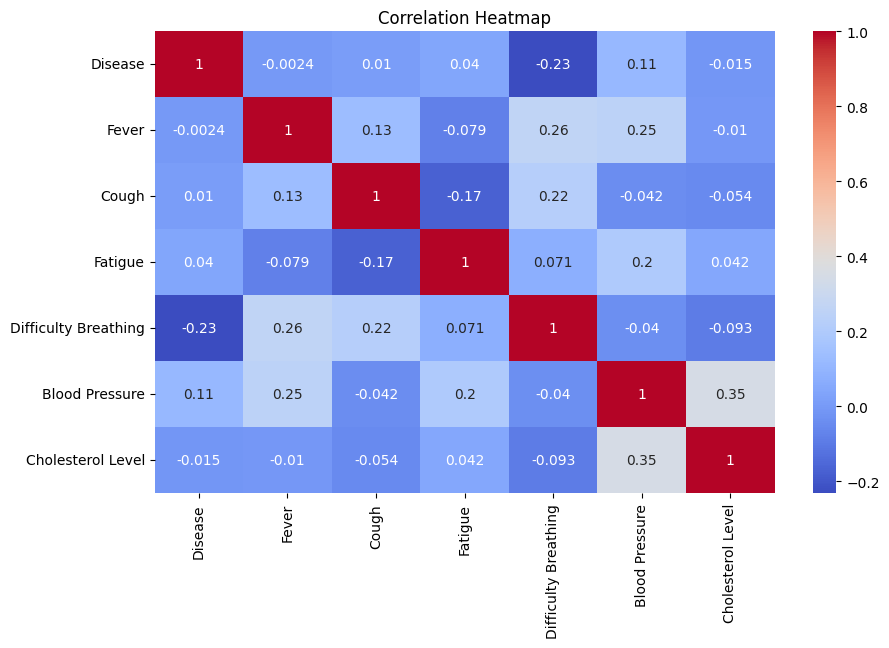

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm')  
plt.title("Correlation Heatmap")
plt.show()



* Closer to 1 → strong positive relation.

* Closer to -1 → strong negative relation.

* Around 0 → weak or no linear relation.

- This means no single symptom strongly predicts the disease on its own.

- But a combination of symptoms could still predict diseases (which is what ML models do better than correlation).

In [35]:
#saving encoded data in csv format
data_copy.to_csv("encoded_dataset.csv", index=False)


# ML working
* Use features = symptoms + demographics (Age, Gender, BP, Cholesterol, Outcome Variable).
Target = Disease.

In [37]:
'''import pickle

with open('cleaned_data.pkl', 'wb') as f:
    pickle.dump(cleaned_data, f)'''

"import pickle\n\nwith open('cleaned_data.pkl', 'wb') as f:\n    pickle.dump(cleaned_data, f)"

In [38]:
'''from sklearn.preprocessing import LabelEncoder
import pickle

# assuming df['Disease'] is your target column
label_encoder = LabelEncoder()
label_encoder.fit(cleaned_data['Disease'])
labeled_data = label_encoder.transform(cleaned_data['Disease'])

# save again
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)
'''

'from sklearn.preprocessing import LabelEncoder\nimport pickle\n\n# assuming df[\'Disease\'] is your target column\nlabel_encoder = LabelEncoder()\nlabel_encoder.fit(cleaned_data[\'Disease\'])\nlabeled_data = label_encoder.transform(cleaned_data[\'Disease\'])\n\n# save again\nwith open("label_encoder.pkl", "wb") as f:\n    pickle.dump(label_encoder, f)\n'

In [39]:
#from sklearn import preprocessing

# Create a LabelEncoder object
#le = preprocessing.LabelEncoder()

# Original categorical data
#data = ['apple', 'orange', 'pineapple', 'orange', 'apple']

# Fit the LabelEncoder to the data and transform it
#le.fit(data)
#encoded_data = le.transform(data)

#print(f"Original data: {data}")
#print(f"Encoded data: {encoded_data}")

# Decode the encoded data back to original categories
#decoded_data = le.inverse_transform(encoded_data)

#print(f"Decoded data: {decoded_data}")

In [40]:
# now you can use 'le' to encode/decode your disease labels
#decoded_labels = label_encoder.inverse_transform(labeled_data)

In [41]:
#print(decoded_labels)